In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df = pd.read_excel("Cleansed.xlsx")
df

,Gender,Age,Ethnicity,Religion,Parents Work,Siblings,Housing,Current GPA,Desired GPA,Absences,...,Future Planned,Career Option 1,Career Option 2,Career Option 3,Interested Career 1,Interested Career 2,Interested Career 3,Skill 1,Skill 2,Skill 3
0,Male,19,Chinese,Buddhist,Both Works,2,HDB,2.71,2.86,0,...,Not yet,Nan,Nan,Nan,Software Developer,Ai Analyst,Cybersecurity Expert,Code,Detailed,Adaptable
1,Male,21,Chinese,Buddhist,Both Works,2,HDB,0.98,1.50,6,...,Not yet,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan
2,Male,19,Chinese,Buddhist,Father Only,2,Condominium,2.86,3.30,0,...,Not yet,Nan,Nan,Nan,Entrepreneur,Food Reviewer,Food Vlogger,Innovative,Critical,Entertaining
3,Male,22,Chinese,Catholic,Both Works,2,Bungalow,3.10,4.00,7,...,Undecided,Nan,Nan,Nan,Nan,Nan,Nan,Detailed,Nan,Nan
4,Male,19,Chinese,Buddhist,Both Works,1,HDB,3.00,3.50,1,...,Undecided,Nan,Nan,Nan,Engineer,Nan,Nan,Nan,Nan,Nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,Female,19,Indian,Islam,Both Works,2,HDB,3.45,3.60,3,...,Not yet,Nan,Nan,Nan,Teacher,Hospital Lab,Pharmacist,Precision,Laboratory Skills,Timeliness
197,Male,19,Chinese,Buddhist,Mother Only,2,HDB,2.90,3.50,0,...,Undecided,Nan,Nan,Nan,Translator,Reporter,Sports Commentator,Language,Outspoken,Confidence
198,Female,19,Chinese,Christian,Both Works,2,Condominium,2.40,3.00,1,...,Not yet,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan
199,Female,24,Chinese,Christian,Mother Only,4,HDB,1.81,2.50,0,...,Planned,Nurse,Journalist,Nan,Nan,Nan,Nan,Patience,Writing Skills,Communication Skills


Average GPA for each Game Hours group:
               Game Hours  Current GPA
0                 10 - 19     3.060000
1                 20 - 29     3.090000
2                 30 - 39     3.001429
3                 40 - 49     2.960833
4                 50 - 59     2.443333
5                 60 - 69     2.690000
6                 70 - 84     3.080000
7                     < 9     2.746591
8                    > 84     2.528889
9  Don't Play Video Games     2.830189
Filtered Average GPA (higher than 3.00):
  Game Hours  Current GPA
0    10 - 19     3.060000
1    20 - 29     3.090000
2    30 - 39     3.001429
6    70 - 84     3.080000
Sorted Filtered Average GPA (in descending order):
  Game Hours  Current GPA
1    20 - 29     3.090000
6    70 - 84     3.080000
0    10 - 19     3.060000
2    30 - 39     3.001429


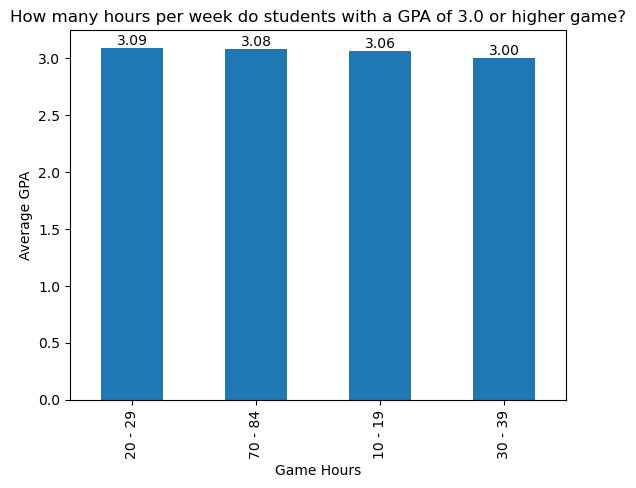

In [10]:
avg_gpa = df.groupby('Game Hours')['Current GPA'].mean().reset_index()
print("Average GPA for each Game Hours group:")
print(avg_gpa)

# Filter out groups with an average GPA higher than 3.00
filtered_avg_gpa = avg_gpa[avg_gpa['Current GPA'] > 3.00]
print("Filtered Average GPA (higher than 3.00):")
print(filtered_avg_gpa)

# Sort the filtered results in descending order
sorted_filtered_avg_gpa = filtered_avg_gpa.sort_values(by='Current GPA', ascending=False)
print("Sorted Filtered Average GPA (in descending order):")
print(sorted_filtered_avg_gpa)

# Check if the filtered results are not empty
if not filtered_avg_gpa.empty:
    sorted_filtered_avg_gpa = filtered_avg_gpa.sort_values(by='Current GPA', ascending=False)
    ax = sorted_filtered_avg_gpa.plot(kind='bar', x='Game Hours', y='Current GPA', legend=False)
    plt.title('How many hours per week do students with a GPA of 3.0 or higher game?')
    plt.xlabel('Game Hours')
    plt.ylabel('Average GPA')

    # Add the GPA numbers above the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5),  # Adjust the text position
                    textcoords='offset points')
    
    plt.show()
else:
    print("No Game Hours with an average GPA higher than 3.00.")

Average GPA for each Part-Time Hours group:
       Part-Time Hours  Current GPA
0  2015-11-01 00:00:00     2.701667
1  2024-10-06 00:00:00     2.930769
2              16 - 20     3.017500
3              21 - 25     3.023333
4              26 - 30     3.060000
5                  < 5     3.094444
6                 > 35     2.844000
7           Don't Work     2.878849
Filtered Average GPA (higher than 3.00):
  Part-Time Hours  Current GPA
2         16 - 20     3.017500
3         21 - 25     3.023333
4         26 - 30     3.060000
5             < 5     3.094444
Sorted Filtered Average GPA (in descending order):
  Part-Time Hours  Current GPA
5             < 5     3.094444
4         26 - 30     3.060000
3         21 - 25     3.023333
2         16 - 20     3.017500


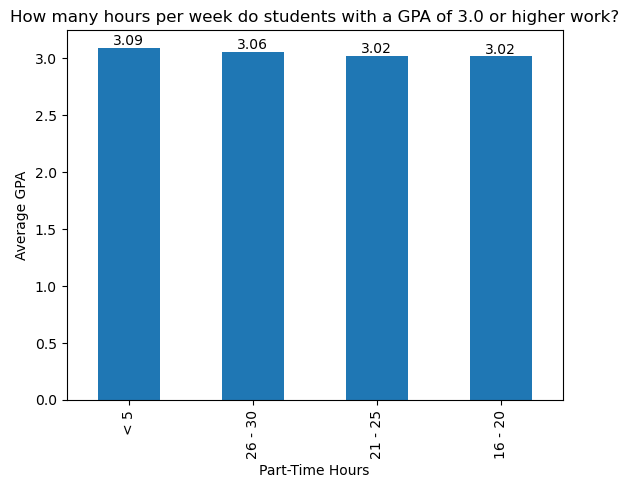

In [4]:
avg_gpa = df.groupby('Part-Time Hours')['Current GPA'].mean().reset_index()
print("Average GPA for each Part-Time Hours group:")
print(avg_gpa)

# Filter out groups with an average GPA higher than 3.00
filtered_avg_gpa = avg_gpa[avg_gpa['Current GPA'] > 3.00]
print("Filtered Average GPA (higher than 3.00):")
print(filtered_avg_gpa)

# Sort the filtered results in descending order
sorted_filtered_avg_gpa = filtered_avg_gpa.sort_values(by='Current GPA', ascending=False)
print("Sorted Filtered Average GPA (in descending order):")
print(sorted_filtered_avg_gpa)

# Check if the filtered results are not empty
if not filtered_avg_gpa.empty:
    sorted_filtered_avg_gpa = filtered_avg_gpa.sort_values(by='Current GPA', ascending=False)
    ax = sorted_filtered_avg_gpa.plot(kind='bar', x='Part-Time Hours', y='Current GPA', legend=False)
    plt.title('How many hours per week do students with a GPA of 3.0 or higher work?')
    plt.xlabel('Part-Time Hours')
    plt.ylabel('Average GPA')

    # Add the GPA numbers above the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5),
                    textcoords='offset points')
    
    plt.show()
else:
    print("No Part-Time Hours with an average GPA higher than 3.00.")

Average GPA for each No. of CCAs group:
  No. Of CCAs Participated  Current GPA
0                        0     2.801443
1                        1     2.958750
2                        2     3.095385
3                        3     2.838750
4                        4     2.514000
5                      > 4     3.560000
Sorted Average GPA (in descending order):
  No. Of CCAs Participated  Current GPA
5                      > 4     3.560000
2                        2     3.095385
1                        1     2.958750
3                        3     2.838750
0                        0     2.801443
4                        4     2.514000


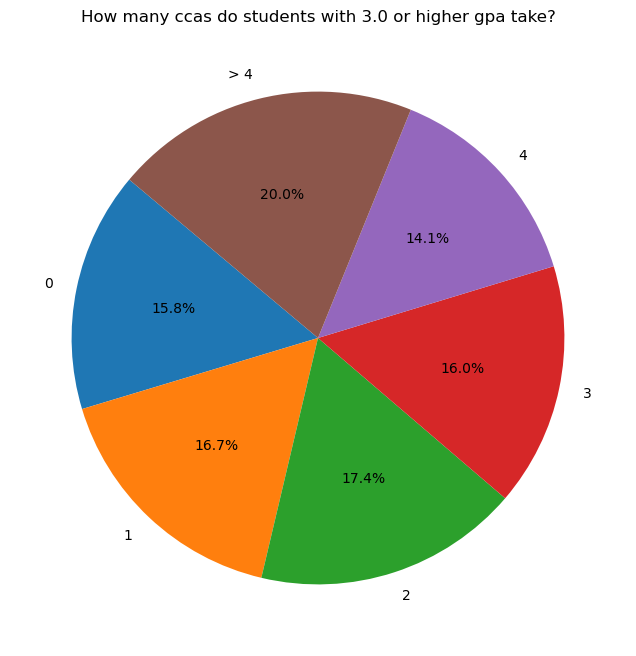

In [5]:
df['No. Of CCAs Participated'] = df['No. Of CCAs Participated'].replace("Don't Have CCA", 0)

avg_gpa = df.groupby('No. Of CCAs Participated')['Current GPA'].mean().reset_index()
print("Average GPA for each No. of CCAs group:")
print(avg_gpa)

sorted_avg_gpa = avg_gpa.sort_values(by='Current GPA', ascending=False)
print("Sorted Average GPA (in descending order):")
print(sorted_avg_gpa)

plt.figure(figsize=(8, 8))
plt.pie(avg_gpa['Current GPA'], labels=avg_gpa['No. Of CCAs Participated'], autopct='%1.1f%%', startangle=140)
plt.title('How many ccas do students with 3.0 or higher gpa take?')
plt.show()

Average GPA for each No. of Absences group:
    Absences  Current GPA
0          0     2.983614
1          1     2.866857
2          2     2.778800
3          3     3.077000
4          4     2.711111
5          5     2.803571
6          6     2.585000
7          7     2.562500
8          8     3.250000
9         10     2.680000
10        11     2.620000
11        35     0.600000
Sorted Average GPA (in descending order):
    Absences  Current GPA
8          8     3.250000
3          3     3.077000
0          0     2.983614
1          1     2.866857
5          5     2.803571
2          2     2.778800
4          4     2.711111
9         10     2.680000
10        11     2.620000
6          6     2.585000
7          7     2.562500
11        35     0.600000


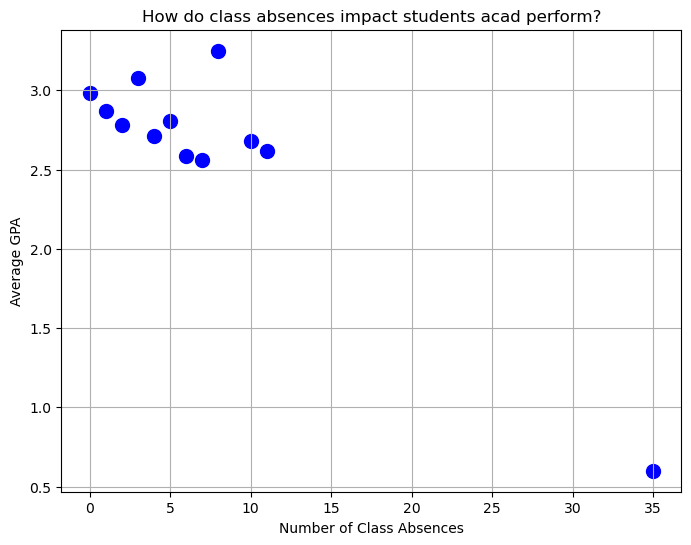

In [6]:
avg_gpa = df.groupby('Absences')['Current GPA'].mean().reset_index()
print("Average GPA for each No. of Absences group:")
print(avg_gpa)

sorted_avg_gpa = avg_gpa.sort_values(by='Current GPA', ascending=False)
print("Sorted Average GPA (in descending order):")
print(sorted_avg_gpa)


plt.figure(figsize=(8, 6))
plt.scatter(avg_gpa['Absences'], avg_gpa['Current GPA'], color='blue', s=100)
plt.title('How do class absences impact students acad perform?')
plt.xlabel('Number of Class Absences')
plt.ylabel('Average GPA')
plt.grid(True)
plt.show()

In [7]:
print(df['Game Timing'])

0                        1800
1      Don't Play Video Games
2                        2000
3                        1800
4                        1300
                ...          
196    Don't Play Video Games
197                      2000
198                      1200
199    Don't Play Video Games
200    Don't Play Video Games
Name: Game Timing, Length: 201, dtype: object


Game Timing
0       2.571250
100     3.500000
200     3.500000
300     3.500000
400     3.500000
500     3.500000
600     3.175000
700     2.240000
800     2.240000
900     2.910000
1000    2.910000
1100    2.750000
1200    2.876667
1300    3.030000
1400    3.030000
1500    3.260000
1600    1.830000
1700    3.036667
1800    2.805294
1900    3.034667
2000    2.981111
2100    2.992353
2200    2.806818
2300    3.392000
Name: Current GPA, dtype: float64


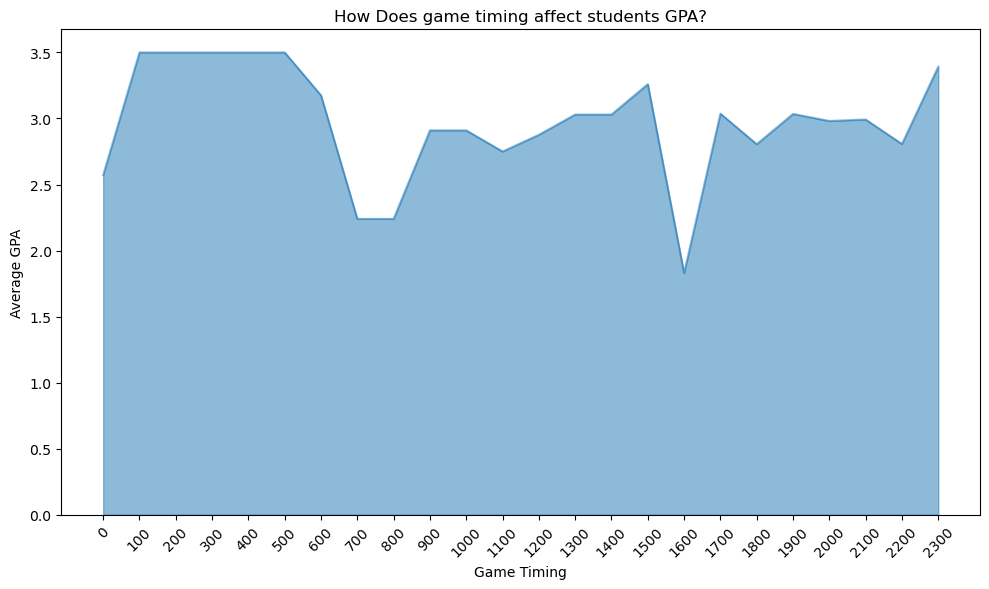

In [8]:
df['Game Timing'] = pd.to_numeric(df['Game Timing'], errors='coerce')


df = df[df['Game Timing'] != "Don't Play Video Games"]


avg_gpa = df.groupby('Game Timing')['Current GPA'].mean()


avg_gpa = avg_gpa.reindex(range(0, 2400, 100), method='ffill')
print(avg_gpa)


avg_gpa.plot(kind='area', stacked=False, alpha=0.5, figsize=(10, 6))
plt.title('How Does game timing affect students GPA?')
plt.xlabel('Game Timing')
plt.ylabel('Average GPA')
plt.xticks(range(0, 2400, 100), rotation=45)
plt.tight_layout()
plt.show()